In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
measurement = Base.classes.measurement
station = Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [9]:
# Find the most recent date in the data set.
session.query(measurement.date).order_by(measurement.date.desc()).first()

('2017-08-23',)

FileNotFoundError: [Errno 2] No such file or directory: '/Images/percipitation.png'

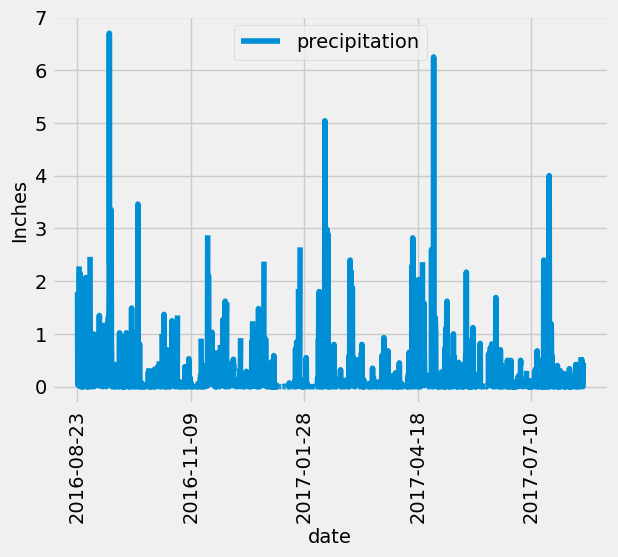

In [10]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

most_recent = dt.date(2017, 8, 23)

# Calculate the date one year from the last date in data set.

past_year = most_recent - dt.timedelta(days=365)

# Perform a query to retrieve the data and precipitation scores

results = session.query(measurement.date, measurement.prcp).filter(measurement.date >= past_year).all()

# Save the query results as a Pandas DataFrame. Explicitly set the column names

df = pd.DataFrame(results, columns=['date', 'precipitation'])
df.set_index(df['date'], inplace=True)

# Sort the dataframe by date
df = df.sort_index()

# Use Pandas Plotting with Matplotlib to plot the data
ax = df.plot()
ax.set_ylabel('Inches')
plt.xticks(rotation=90)
plt.savefig('Images/percipitation.png', bbox_inches="tight")
plt.show()


In [ ]:
# Use Pandas to calculate the summary statistics for the precipitation data
df.describe()

# Exploratory Station Analysis

In [ ]:
# Design a query to calculate the total number of stations in the dataset
session.query(func.count(station.station)).all()

In [ ]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
session.query(measurement.station, func.count(measurement.station)).group_by(measurement.station)\
.order_by(func.count(measurement.station).desc()).all()

In [ ]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
session.query(func.min(measurement.tobs), func.max(measurement.tobs),
              func.avg(measurement.tobs)).filter(measurement.station == 'USC00519281').all()

In [ ]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

last_12_months = session.query(measurement.tobs).filter(measurement.station == 'USC00519281')\
.filter(measurement.date >= past_year).all()

station_df = pd.DataFrame(last_12_months, columns=['tobs'])
ax = station_df.plot(kind='hist', bins=12)
ax.set_xlabel('Temperature (f)')
plt.savefig('Images/station_temp.png', bbox_inches="tight")
plt.show()

# Close Session

In [ ]:
# Close Session
session.close()